In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

#### Transformers types
    1.Function transform
    2.Power transform
#### By using Function transform we can perform
    a.Log transform
    b.Recipocal transform
    c.Square and sqrt transform
#### By using Power transform we can perform
    1.Box-cox transform
    2.Yeo-jhosnson transform
   
    

In [16]:
df = pd.read_csv('adult.csv',usecols=['age','hours.per.week','income'])
df 

,age,hours.per.week,income
0,90,40,<=50K
1,82,18,<=50K
2,66,40,<=50K
3,54,40,<=50K
4,41,40,<=50K
...,...,...,...
32556,22,40,<=50K
32557,27,38,<=50K
32558,40,40,>50K
32559,58,40,<=50K


(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

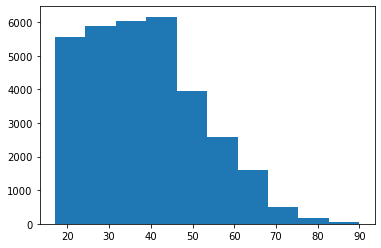

In [17]:
plt.hist(df['age'])

In [18]:
import seaborn as sns

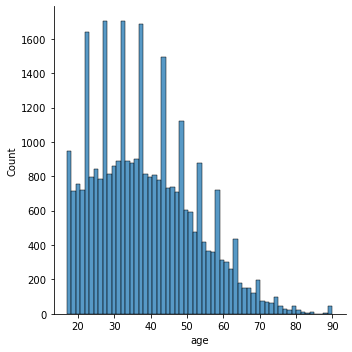

In [19]:
sns.displot(df['age'])

#### Log transform
    1. In Log transform we take the log of every value.
    2. We can not apply log transform in negative values because we can not take the log of negative values.
    3. Log transform should be apply in right skewed data.
    ____________________________________________________________________________________________________
    1        10                  100                               1000                               10000
    after log transformation the values will be in an equi-distance
    ____________________________________________
    1  10  100  1000(in a log scale all values comes to the equi-distance)
    
    

### Other Transform

#### Recipocal Transform(1/x)
    1
    
#### Square Transform(x*x)
    1.It is used for left skewed data.
#### Sqrt Transform (sqrt(x))

In [20]:
df 

,age,hours.per.week,income
0,90,40,<=50K
1,82,18,<=50K
2,66,40,<=50K
3,54,40,<=50K
4,41,40,<=50K
...,...,...,...
32556,22,40,<=50K
32557,27,38,<=50K
32558,40,40,>50K
32559,58,40,<=50K


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [22]:
df.isnull().mean()*100

age               0.0
hours.per.week    0.0
income            0.0
dtype: float64

In [28]:
df

,age,hours.per.week,income
0,90,40,<=50K
1,82,18,<=50K
2,66,40,<=50K
3,54,40,<=50K
4,41,40,<=50K
...,...,...,...
32556,22,40,<=50K
32557,27,38,<=50K
32558,40,40,>50K
32559,58,40,<=50K


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
enc = LabelEncoder()

In [32]:
df['income'] = enc.fit_transform(df['income'])

In [33]:
df 

,age,hours.per.week,income
0,90,40,0
1,82,18,0
2,66,40,0
3,54,40,0
4,41,40,0
...,...,...,...
32556,22,40,0
32557,27,38,0
32558,40,40,1
32559,58,40,0


In [35]:
# if greator =50k means 0 otherwise 1

In [38]:
x = df.drop(columns='income')
y = df['income']

In [39]:
x 

,age,hours.per.week
0,90,40
1,82,18
2,66,40
3,54,40
4,41,40
...,...,...
32556,22,40
32557,27,38
32558,40,40
32559,58,40


In [40]:
y 

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

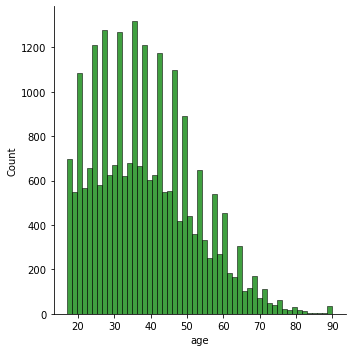

In [43]:
sns.displot(x_train['age'],color="green")

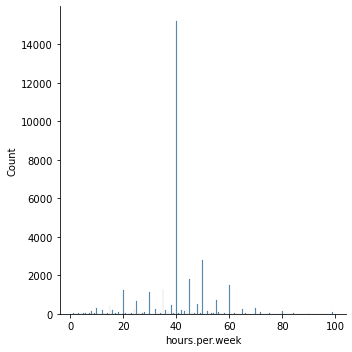

In [44]:
sns.displot(df['hours.per.week'])

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [49]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)

In [51]:
print("Accuracy of Logistic=",accuracy_score(y_test,y_pred1))
print("Accuracy of Decision tree=",accuracy_score(y_test,y_pred2))

Accuracy of Logistic= 0.7572779756786635
Accuracy of Decision tree= 0.7634197273062278


#### Distribution before transformation

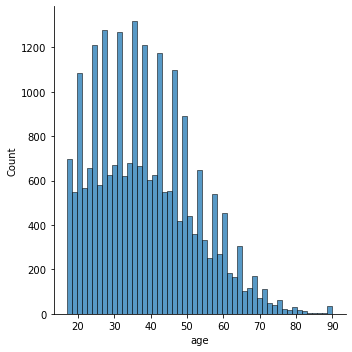

In [63]:
sns.displot(x_train['age'])

In [52]:
# apply log transform

In [53]:
trf = FunctionTransformer(func=np.log1p)

In [60]:
trf 

FunctionTransformer(func=<ufunc 'log1p'>)

In [54]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf  = trf.fit_transform(x_test)

#### Distribution after apply transformer

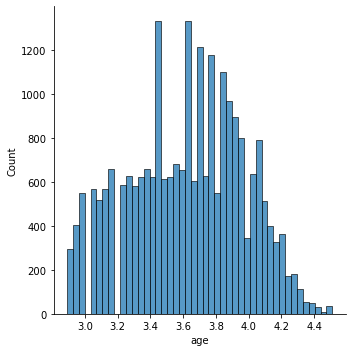

In [62]:
sns.displot(x_train_trf['age'])

In [55]:
clf11 = LogisticRegression()
clf12 = DecisionTreeClassifier()

In [57]:
clf11.fit(x_train_trf,y_train)
clf12.fit(x_train_trf,y_train)

DecisionTreeClassifier()

In [58]:
y_pred11 = clf11.predict(x_test_trf)
y_pred12 = clf12.predict(x_test_trf)

In [59]:
print("Accuracy of Logistic=",accuracy_score(y_test,y_pred11))
print("Accuracy of Decision Tree=",accuracy_score(y_test,y_pred12))

Accuracy of Logistic= 0.7594890062645867
Accuracy of Decision Tree= 0.7632968922736765
